In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os
import torch
from torch.utils.data import Dataset
from PIL import Image
from torchvision.transforms import ToTensor, ToPILImage
from collections import Counter

In [2]:
sem_df=pd.read_excel("SEM_Final.xlsx")
print(sem_df.shape)
sem_df.head()

(1603, 15)


,link,title,num,letter,hydrogel,sentence,figure,SEM,SEM_img,scale,modulus,measurement,modification,skip,Unnamed: 14
0,https://pubs.acs.org/doi/10.1021/acsami.5b00184,Tough and Biocompatible Hydrogels Based on in ...,S3.,a,PVA,SEM images of the dehydrated PVA,sem/10.1021_acsami.5b00184\supp_7.jpg,sem/10.1021_acsami.5b00184\SEM,supp_7_SEM3.jpg,-5.0,compressive,42.3 kPa,NaN,NaN,NaN
1,https://pubs.acs.org/doi/10.1021/acsami.5b00185,Tough and Biocompatible Hydrogels Based on in ...,S3.,a,PVA,SEM images of the dehydrated PVA,sem/10.1021_acsami.5b00184\supp_7.jpg,sem/10.1021_acsami.5b00184\SEM,supp_7_SEM5.jpg,-6.0,compressive,42.3 kPa,NaN,NaN,NaN
2,https://pubs.acs.org/doi/10.1021/acsami.5b00186,Tough and Biocompatible Hydrogels Based on in ...,S3.,b,E-cGO0.5/PVA-2,and E-cGO/PVA-2IPN hydrogels with E-cGO con...,sem/10.1021_acsami.5b00184\supp_7.jpg,sem/10.1021_acsami.5b00184\SEM,supp_7_SEM1.jpg,-5.0,compressive,60 kPa,NaN,NaN,NaN
3,https://pubs.acs.org/doi/10.1021/acsami.5b00187,Tough and Biocompatible Hydrogels Based on in ...,S3.,b,E-cGO0.5/PVA-2,and E-cGO/PVA-2IPN hydrogels with E-cGO con...,sem/10.1021_acsami.5b00184\supp_7.jpg,sem/10.1021_acsami.5b00184\SEM,supp_7_SEM0.jpg,-6.0,compressive,60 kPa,NaN,NaN,NaN
4,https://pubs.acs.org/doi/10.1021/acsami.5b00188,Tough and Biocompatible Hydrogels Based on in ...,S3.,c,E-cGO1.0/PVA-2,and E-cGO/PVA-2IPN hydrogels with E-cGO con...,sem/10.1021_acsami.5b00184\supp_7.jpg,sem/10.1021_acsami.5b00184\SEM,supp_7_SEM6.jpg,-5.0,compressive,60 kPa,NaN,NaN,NaN


In [3]:
sem_df.isna().sum()

link               0
title              0
num                0
letter             4
hydrogel           0
sentence          16
figure             0
SEM                0
SEM_img          746
scale            745
modulus          769
measurement      772
modification    1603
skip             824
Unnamed: 14     1414
dtype: int64

In [4]:
measure_sem_df = sem_df[sem_df['skip'].isna()]
measure_sem_df = measure_sem_df[measure_sem_df['measurement'].isna()]
print(measure_sem_df.shape)
measure_sem_df.to_csv("missing_measurement.csv")
measure_sem_df.head()

(3, 15)


,link,title,num,letter,hydrogel,sentence,figure,SEM,SEM_img,scale,modulus,measurement,modification,skip,Unnamed: 14
502,https://pubs.acs.org/doi/10.1021/acsami.9b20612,Multifunctional Conductive Hydrogel/Thermochro...,Figure 1,a,"PAAm, rGO-PAAm, polyAMPS-co-AAm, rGO- PolyAMPS...",schematic conduction mechanisms and photos of...,sem/10.1021_acsami.9b20612\am9b20612_0003.jpeg,sem/10.1021_acsami.9b20612\SEM,am9b20612_0003_SEM1,-5.0,tensile,NaN,NaN,NaN,NaN
503,https://pubs.acs.org/doi/10.1021/acsami.9b20612,Multifunctional Conductive Hydrogel/Thermochro...,Figure 1,a,"PAAm, rGO-PAAm, polyAMPS-co-AAm, rGO- PolyAMPS...",schematic conduction mechanisms and photos of...,sem/10.1021_acsami.9b20612\am9b20612_0003.jpeg,sem/10.1021_acsami.9b20612\SEM,am9b20612_0003_SEM1,-5.0,comressive,NaN,NaN,NaN,NaN
1026,https://pubs.acs.org/doi/10.1021/acsaem.0c01584,Adjusting Channel Size within PVA-Based Hydrog...,S16.,b,MoS2-PVA-0h,rheological properties of MoS2-PVA-0h hydroge...,sem/10.1021_acsaem.0c01584\supp_2.jpg,sem/10.1021_acsaem.0c01584\SEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
parsed_sem_df = sem_df[sem_df['measurement'].notna()]
parsed_sem_df = parsed_sem_df[parsed_sem_df['SEM_img'].notna()]
print(parsed_sem_df['skip'].isna().sum())
parsed_sem_df = parsed_sem_df[parsed_sem_df['skip'].isna()]
print(parsed_sem_df.shape)
parsed_sem_df.head()

818
(818, 15)


,link,title,num,letter,hydrogel,sentence,figure,SEM,SEM_img,scale,modulus,measurement,modification,skip,Unnamed: 14
0,https://pubs.acs.org/doi/10.1021/acsami.5b00184,Tough and Biocompatible Hydrogels Based on in ...,S3.,a,PVA,SEM images of the dehydrated PVA,sem/10.1021_acsami.5b00184\supp_7.jpg,sem/10.1021_acsami.5b00184\SEM,supp_7_SEM3.jpg,-5.0,compressive,42.3 kPa,NaN,NaN,NaN
1,https://pubs.acs.org/doi/10.1021/acsami.5b00185,Tough and Biocompatible Hydrogels Based on in ...,S3.,a,PVA,SEM images of the dehydrated PVA,sem/10.1021_acsami.5b00184\supp_7.jpg,sem/10.1021_acsami.5b00184\SEM,supp_7_SEM5.jpg,-6.0,compressive,42.3 kPa,NaN,NaN,NaN
2,https://pubs.acs.org/doi/10.1021/acsami.5b00186,Tough and Biocompatible Hydrogels Based on in ...,S3.,b,E-cGO0.5/PVA-2,and E-cGO/PVA-2IPN hydrogels with E-cGO con...,sem/10.1021_acsami.5b00184\supp_7.jpg,sem/10.1021_acsami.5b00184\SEM,supp_7_SEM1.jpg,-5.0,compressive,60 kPa,NaN,NaN,NaN
3,https://pubs.acs.org/doi/10.1021/acsami.5b00187,Tough and Biocompatible Hydrogels Based on in ...,S3.,b,E-cGO0.5/PVA-2,and E-cGO/PVA-2IPN hydrogels with E-cGO con...,sem/10.1021_acsami.5b00184\supp_7.jpg,sem/10.1021_acsami.5b00184\SEM,supp_7_SEM0.jpg,-6.0,compressive,60 kPa,NaN,NaN,NaN
4,https://pubs.acs.org/doi/10.1021/acsami.5b00188,Tough and Biocompatible Hydrogels Based on in ...,S3.,c,E-cGO1.0/PVA-2,and E-cGO/PVA-2IPN hydrogels with E-cGO con...,sem/10.1021_acsami.5b00184\supp_7.jpg,sem/10.1021_acsami.5b00184\SEM,supp_7_SEM6.jpg,-5.0,compressive,60 kPa,NaN,NaN,NaN


In [12]:
parsed_sem_df['skip'].value_counts()

Series([], Name: skip, dtype: int64)

In [13]:
parsed_sem_df.isna().sum()

link              0
title             0
num               0
letter            4
hydrogel          0
sentence         11
figure            0
SEM               0
SEM_img           0
scale             6
modulus           3
measurement       0
modification    818
skip            818
Unnamed: 14     737
dtype: int64

In [14]:
missing_sem_df = parsed_sem_df[parsed_sem_df['SEM_img'].isna()]
# missing_sem_df.to_csv("missing_sem_rows.csv")
missing_sem_df.head(40) 

,link,title,num,letter,hydrogel,sentence,figure,SEM,SEM_img,scale,modulus,measurement,modification,skip,Unnamed: 14


In [15]:
missing_sem_df['skip'].value_counts()

Series([], Name: skip, dtype: int64)

In [18]:
parsed_sem_df['img_path'] = parsed_sem_df.apply(lambda x: os.path.join(x['SEM'],x['SEM_img']),axis=1)

In [19]:
parsed_sem_df['img_path']

0          sem/10.1021_acsami.5b00184\SEM\supp_7_SEM3.jpg
1          sem/10.1021_acsami.5b00184\SEM\supp_7_SEM5.jpg
2          sem/10.1021_acsami.5b00184\SEM\supp_7_SEM1.jpg
3          sem/10.1021_acsami.5b00184\SEM\supp_7_SEM0.jpg
4          sem/10.1021_acsami.5b00184\SEM\supp_7_SEM6.jpg
                              ...                        
1598    sem/10.1021_acs.langmuir.8b02918\SEM\la-2018-0...
1599    sem/10.1021_acs.langmuir.8b02918\SEM\la-2018-0...
1600    sem/10.1021_acsbiomaterials.0c00143\SEM\ab0c00...
1601    sem/10.1021_acsbiomaterials.0c00143\SEM\ab0c00...
1602    sem/10.1021_acsbiomaterials.0c00143\SEM\ab0c00...
Name: img_path, Length: 818, dtype: object

In [34]:
# clean dataset to get correct labels
parsed_sem_df['measurement']

def convert_measurement(string):
    string.replace(" ","")
    kpa = ["KPa","kPa", "Kpa", "kpa","KpA"]
    mpa = ["Mpa","MPa"]
    gpa = ["GPa","Gpa"]
    
    if any(KPA in string for KPA in kpa):
        for KPA in kpa:
            string = string.replace(KPA,"")
        string = string.strip()
        value = float(string)
        value *= 1000 
    elif any(MPA in string for MPA in mpa):
        for MPA in mpa:
            string = string.replace(MPA,"")
        string = string.strip()
        value = float(string)
        value *= 1000000
    elif any(GPA in string for GPA in gpa):
        for GPA in gpa:
            string = string.replace(GPA,"")
        string = string.strip()
        value = float(string)
        value *= 1000000000
    elif "Pa" in string:
        string = string.replace("Pa","")
        string = string.strip()
        value = float(string)
    else:
        print(string)
        return
    return value
parsed_sem_df['measurement'].apply(convert_measurement)

0        42300.0
1        42300.0
2        60000.0
3        60000.0
4        60000.0
          ...   
1598    157000.0
1599    162000.0
1600      8000.0
1601     50000.0
1602    120000.0
Name: measurement, Length: 818, dtype: float64

818
(818, 16)
Length: 818


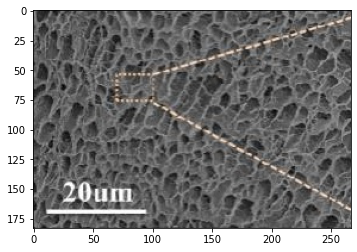

In [39]:
class semDataset(Dataset):
    def __init__(self,filepath="SEM_Final.xlsx", transform = None):
        sem_df=pd.read_excel("SEM_Final.xlsx")
        parsed_sem_df = sem_df[sem_df['measurement'].notna()]
        parsed_sem_df = parsed_sem_df[parsed_sem_df['SEM_img'].notna()]
        print(parsed_sem_df['skip'].isna().sum())
        parsed_sem_df = parsed_sem_df[parsed_sem_df['skip'].isna()]
        parsed_sem_df['img_path'] = parsed_sem_df.apply(lambda x: os.path.join(x['SEM'],x['SEM_img']),axis=1)
        print(parsed_sem_df.shape)
        parsed_sem_df['measurement'].apply(self.convert_measurement)
        self.sem_df = parsed_sem_df
        self.transform = transform
    
    def __len__(self):
        return parsed_sem_df.shape[0]
    
    def convert_measurement(self,string):
        string.replace(" ","")
        kpa = ["KPa","kPa", "Kpa", "kpa","KpA"]
        mpa = ["Mpa","MPa"]
        gpa = ["GPa","Gpa"]

        if any(KPA in string for KPA in kpa):
            for KPA in kpa:
                string = string.replace(KPA,"")
            string = string.strip()
            value = float(string)
            value *= 1000 
        elif any(MPA in string for MPA in mpa):
            for MPA in mpa:
                string = string.replace(MPA,"")
            string = string.strip()
            value = float(string)
            value *= 1000000
        elif any(GPA in string for GPA in gpa):
            for GPA in gpa:
                string = string.replace(GPA,"")
            string = string.strip()
            value = float(string)
            value *= 1000000000
        elif "Pa" in string:
            string = string.replace("Pa","")
            string = string.strip()
            value = float(string)
        else:
            print(string)
            return
        return value
    def __getitem__(self,index):
        image = Image.open(self.sem_df.iloc[index]["img_path"])
        label = self.sem_df.iloc[index]["measurement"]
        if self.transform is not None:
            image = self.transform(image)
        return image, label
semdata = semDataset()
print(f"Length: {len(semdata)}")
image, label=semdata.__getitem__(0)
plt.imshow(image)

In [51]:
resolution = []
cannot_open = 0
for i in range(len(semdata)):
    try:
        image, label=semdata.__getitem__(i)
        resolution.append(image.size)
    except:
        print(parsed_sem_df.iloc[i,:]["img_path"])
        cannot_open+=1
print(f"We cannot open {cannot_open} files")
print(f"Smallest resolution is {min(resolution)}")
print(f"Largest resolution is {max(resolution)}")

sem/10.1021_acsami.0c06674\SEM\am0c06674_0007.jpeg
sem/10.1021_acsami.0c06674\SEM\am0c06674_0007.jpeg
sem/10.1021_acsami.0c06674\SEM\am0c06674_0007.jpeg
sem/10.1021_acsami.0c06674\SEM\am0c06674_0007.jpeg
sem/10.1021_acsami.1c12631\SEM\supp_5 - Copy.jpg
sem/10.1021_acsami.0c00298\SEM\am0c00298_0003_SEM0.jpg
sem/10.1021_acsami.8b21179\SEM\am-2018-211796_0001_SEM5.jpg
sem/10.1021_acsami.8b21179\SEM\am-2018-211796_0001_SEM2.jpg
sem/10.1021_acsapm.9b00234\SEM\ap-2019-00234z_0003_SEM4.jpg
sem/10.1021_acsbiomaterials.7b00229\SEM\Note: Fig. s28 b (not included in the SEM file)
sem/10.1021_acsanm.0c00351\SEM\Note: Fig.2i, not included in SEM folder
sem/10.1021_acsabm.0c00112\SEM\mt0c00112_0002_SEM0
sem/10.1021_acsabm.0c00112\SEM\mt0c00112_0002_SEM1
sem/10.1021_acs.langmuir.7b00749\SEM\la-2017-00749h_0004_SEM2
sem/10.1021_acsami.6b10375\SEM\am-2016-10375r_0005_SEM2
sem/10.1021_acsami.6b10375\SEM\am-2016-10375r_0005_SEM0
sem/10.1021_acsami.6b10375\SEM\am-2016-10375r_0005_SEM3
sem/10.1021_acsami.6